# Analyzing World Happiness Report 2019

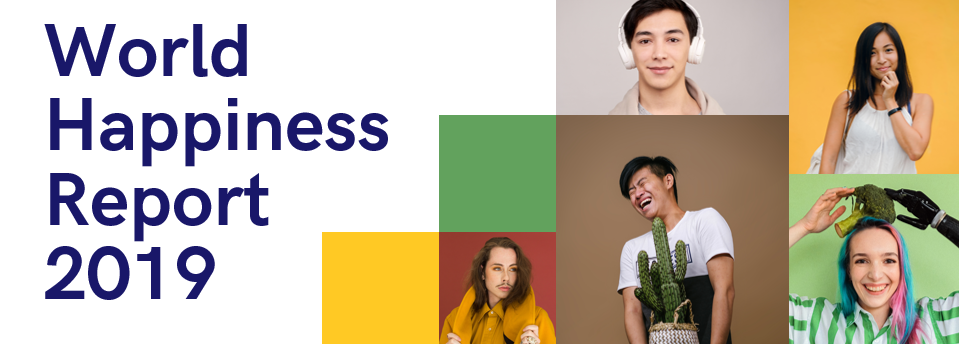

The World Happiness Report measures the overall state of global happiness by factoring in each country's status in economy, health, social support, government trust, etc. and ranks the countries by how happy their citizens perceive themselves to be. Since it covers different factors, it can be a useful guide to measure policy effectiveness and good governance and assess the quality of life among countries.

In this project, we explore and visualize the distribution of happiness scores among countries, identify strong determinants and relationship of factors to one another, and apply ML Linear Regression to test the model used for the report.

Here is the link to the slide pack used: https://drive.google.com/file/d/15q6585HzYGlcFx3PbSPpw5spmRCw_Ozx/view?usp=sharing

Proponents of the project are Janine Cheong, Raymund Norada, Karen Salas, and Maico Rebong. This final project serves as a requirement in our Diploma Course in Foundations in Data Science under De La Salle University. This study was awarded Best in Data Analysis among the thirteen presentations.

## Data Science question: WHAT MAKES A COUNTRY HAPPY?
Guide:
1. What is the distribution of happiness scores around the world?
2. How does each happiness factor correlate with the overall score?
3. How does each happiness factor correlate with one another?
4. What are the most and least sources of happiness for the top and bottom 10 countries?

- Data source: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

### Other References:
- https://www.kaggle.com/sabihaif/world-happiness-report-analysis
- https://www.kaggle.com/saviola07/world-happiness-report-analysis
- https://www.kaggle.com/koki25ando/data-analysis-of-world-happiness-report

## Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Additional libraries

In [2]:
# For visualizations
import plotly.graph_objs as go # plotly graphical object
import chart_studio
chart_studio.tools.set_config_file(world_readable=False, sharing='private')
from string import ascii_letters
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy import stats

# For scaling dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('tableau-colorblind10') #seaborn-whitegrid #tableau-colorblind10 #fivethirtyeight
textColor = '#006680' 
highlightColor = '#3b738f'

# Project Roadmap

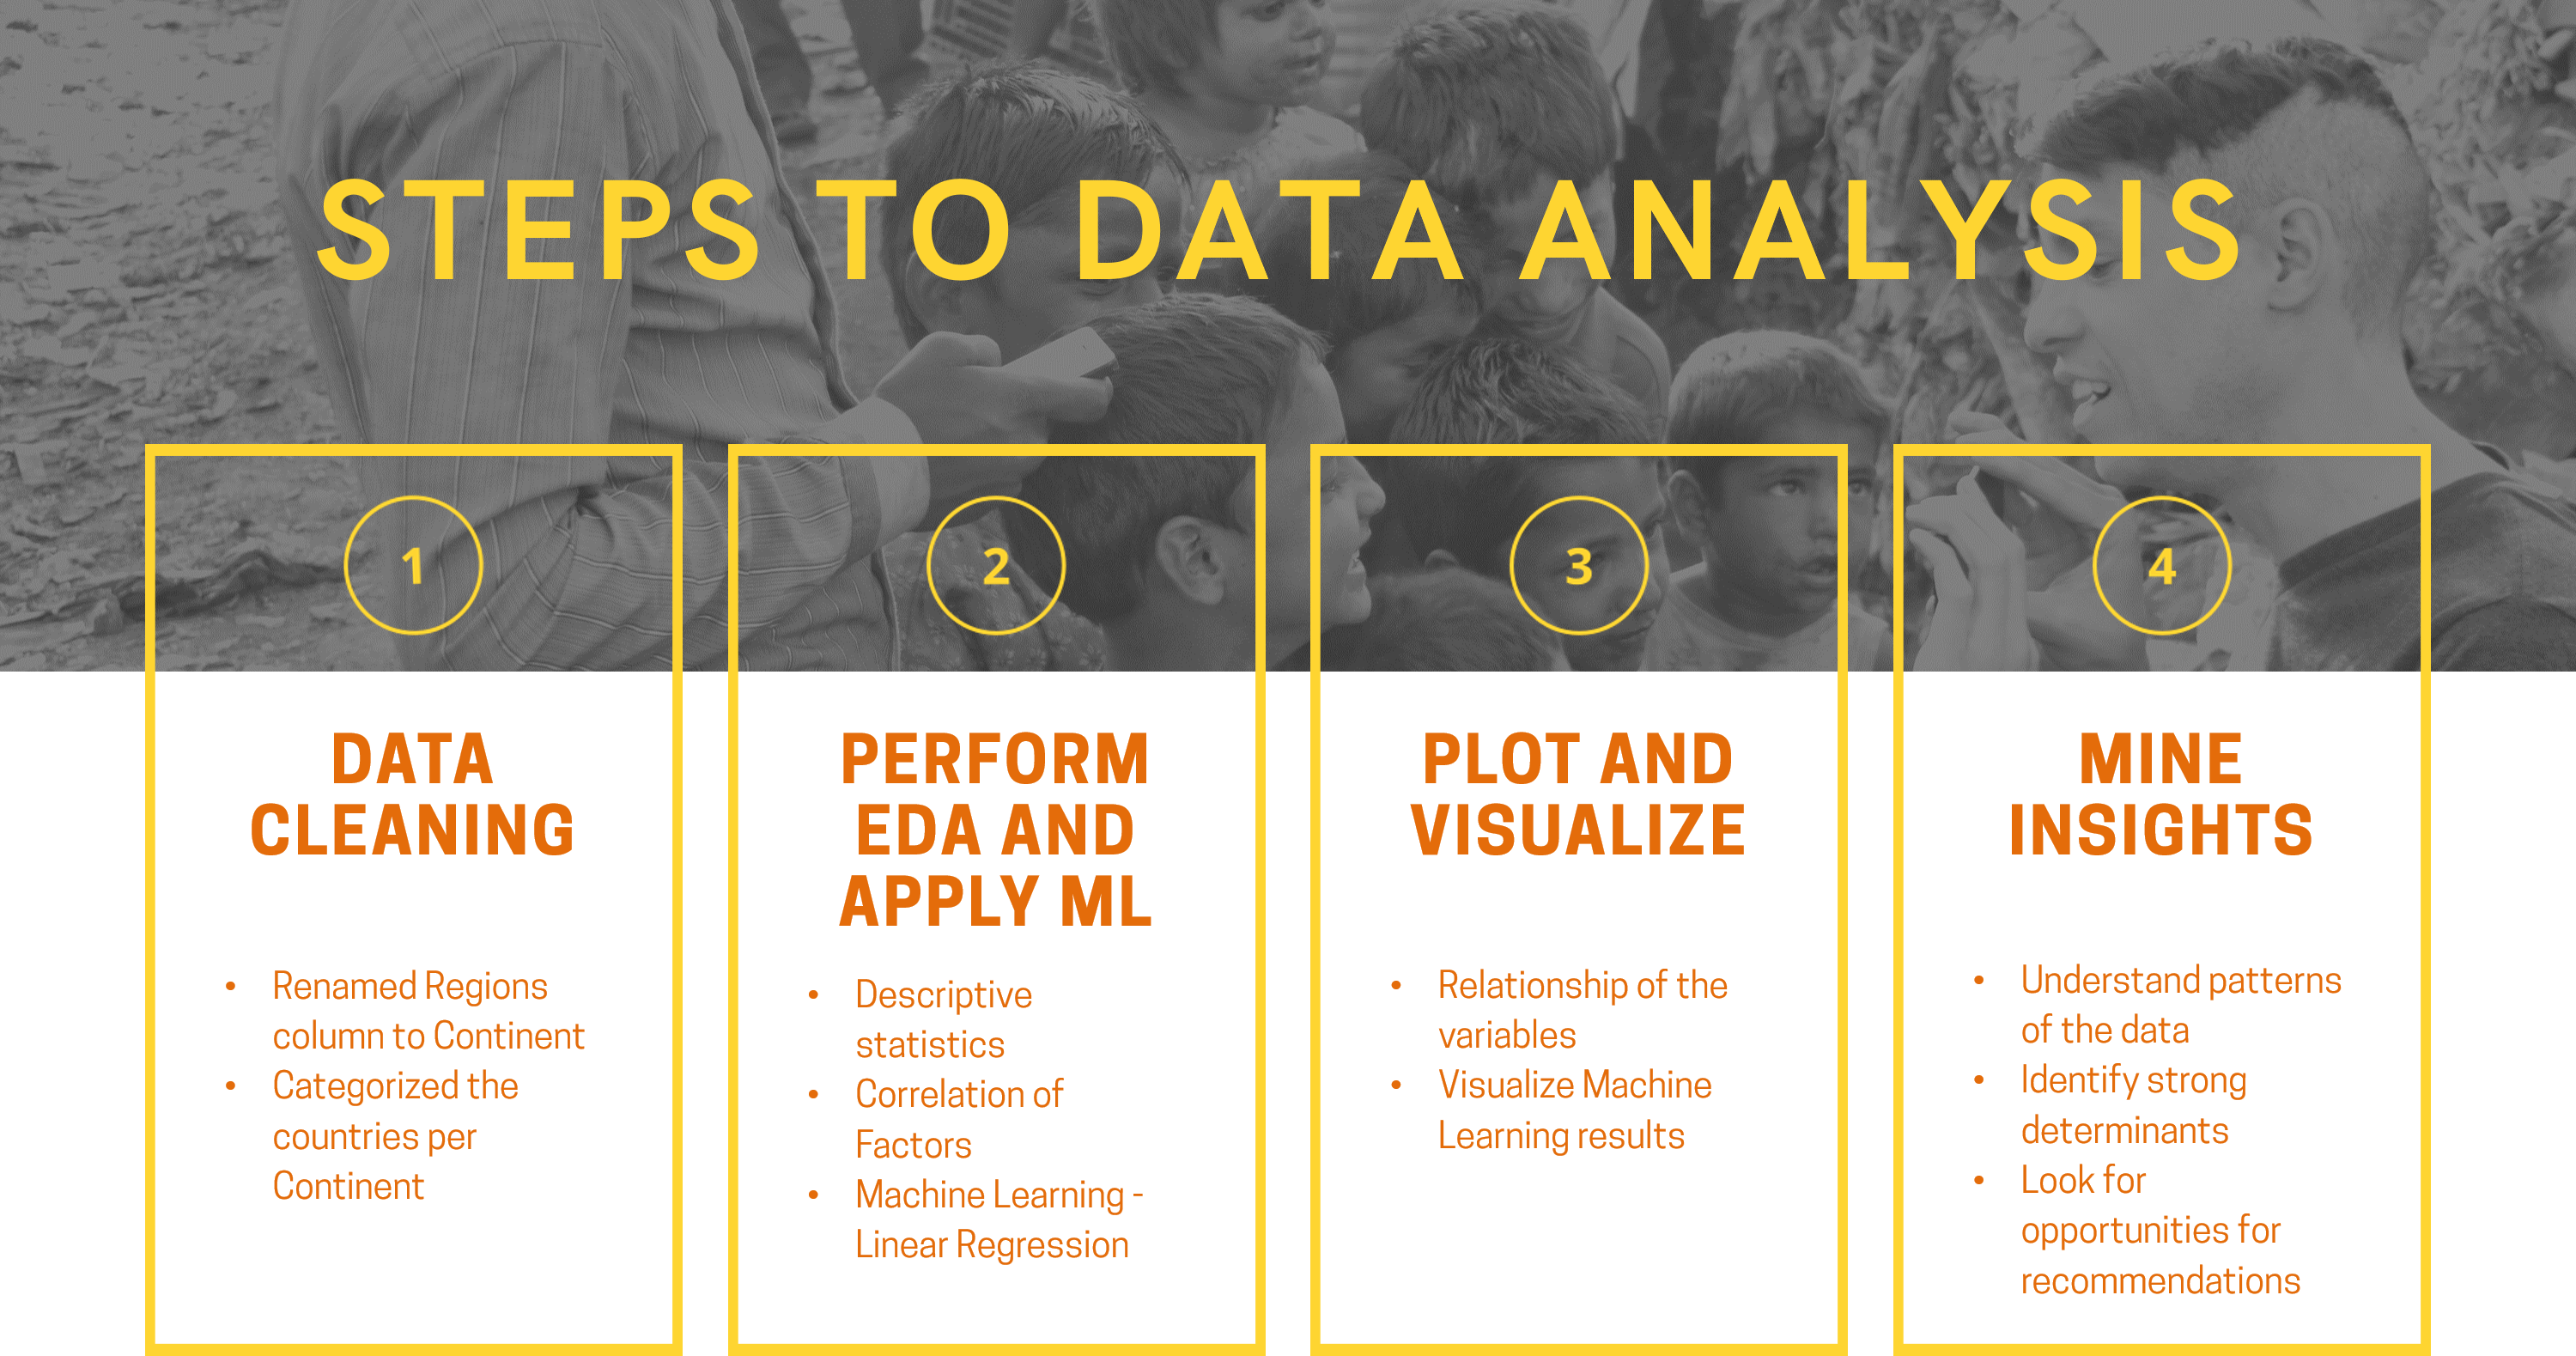

# Let's explore 2019 data

In [4]:
# Load 2019 deep dive data 
df = pd.read_csv(r'C:\Users\ACER\Desktop\DLSU\[WIP] Data Sci Project\[WIP] Data Sci Project\2019.csv')
df['Year'] = df['Year'].astype(object)
df.rename(columns = {'Happiness Rank' : 'Happiness_Rank',
                           'Happiness Score' : 'Happiness_Score',
                           'Standard Error' : 'Standard_Error',
                           'Economy (GDP per Capita)' : 'Economy',
                           'Health (Life Expectancy)' : 'Health',
                          'Trust (Government Corruption)' : 'Government Trust',
                          'Dystopia Residual' : 'Dystopia_Residual',
                             'Social Support': 'Social_Support'}, inplace = True)
df.head()

Year      Country Continent  Happiness_Rank  Happiness_Score  Economy  \
0  2019      Finland    Europe               1            7.769    1.340   
1  2019      Denmark    Europe               2            7.600    1.383   
2  2019       Norway    Europe               3            7.554    1.488   
3  2019      Iceland    Europe               4            7.494    1.380   
4  2019  Netherlands    Europe               5            7.488    1.396   

   Social_Support  Health  Freedom  Generosity  Government Trust  
0           1.587   0.986    0.596       0.153             0.393  
1           1.573   0.996    0.592       0.252             0.410  
2           1.582   1.028    0.603       0.271             0.341  
3           1.624   1.026    0.591       0.354             0.118  
4           1.522   0.999    0.557       0.322             0.298

In [5]:
df.describe()

Happiness_Rank  Happiness_Score     Economy  Social_Support  \
count      156.000000       156.000000  156.000000      156.000000   
mean        78.500000         5.407096    0.905147        1.208814   
std         45.177428         1.113120    0.398389        0.299191   
min          1.000000         2.853000    0.000000        0.000000   
25%         39.750000         4.544500    0.602750        1.055750   
50%         78.500000         5.379500    0.960000        1.271500   
75%        117.250000         6.184500    1.232500        1.452500   
max        156.000000         7.769000    1.684000        1.624000   

           Health     Freedom  Generosity  Government Trust  
count  156.000000  156.000000  156.000000        156.000000  
mean     0.725244    0.392571    0.184846          0.110603  
std      0.242124    0.143289    0.095254          0.094538  
min      0.000000    0.000000    0.000000          0.000000  
25%      0.547750    0.308000    0.108750          0.047000  
50%      0.789000    0.417000    0.177500          0.085500  
75%      0.881750    0.507250    0.248250          0.141250  
max      1.141000    0.631000    0.566000          0.453000

In [6]:
df.isna().sum()

Year                0
Country             0
Continent           0
Happiness_Rank      0
Happiness_Score     0
Economy             0
Social_Support      0
Health              0
Freedom             0
Generosity          0
Government Trust    0
dtype: int64

## Distribution of Happiness Scores

- Bimodal distribution
- Spread across the countries
- Mean and Median are almost the same values

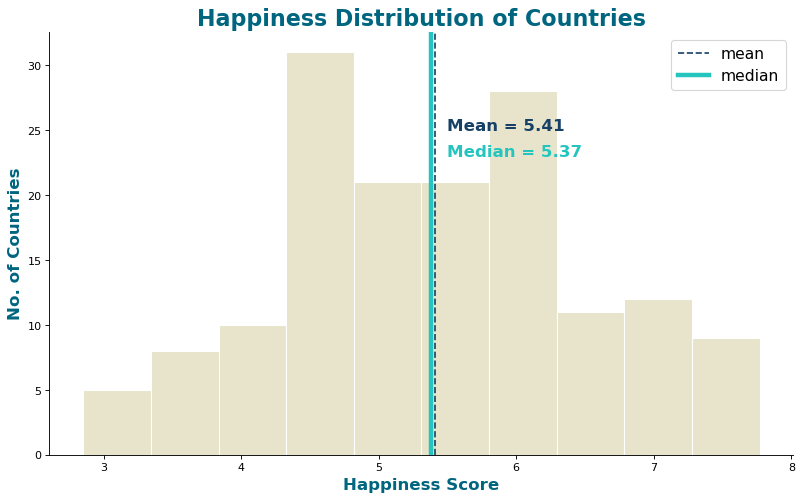

In [7]:
# Add actual mean and median values in the box!!!

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

ax = df['Happiness_Score'].hist(edgecolor='w', figsize=(12, 7), color='#E7E4CB')

ax.set_title('Happiness Distribution of Countries', color='#006680', fontsize=20, fontweight='bold')
ax.set_xlabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('No. of Countries', color='#006680', fontsize=15, fontweight='bold');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

ax.axvline(x=df['Happiness_Score'].mean(), color='#164066', linestyle='--', label='mean')
ax.axvline(x=df['Happiness_Score'].median(), color='#25C5BF', linewidth=4, label='median')

plt.text(5.5,25, 'Mean = 5.41', fontweight='bold', fontsize = 15, color='#164066')
plt.text(5.5,23, 'Median = 5.37', fontweight='bold', fontsize = 15, color='#25C5BF')

ax.legend(fontsize=14);

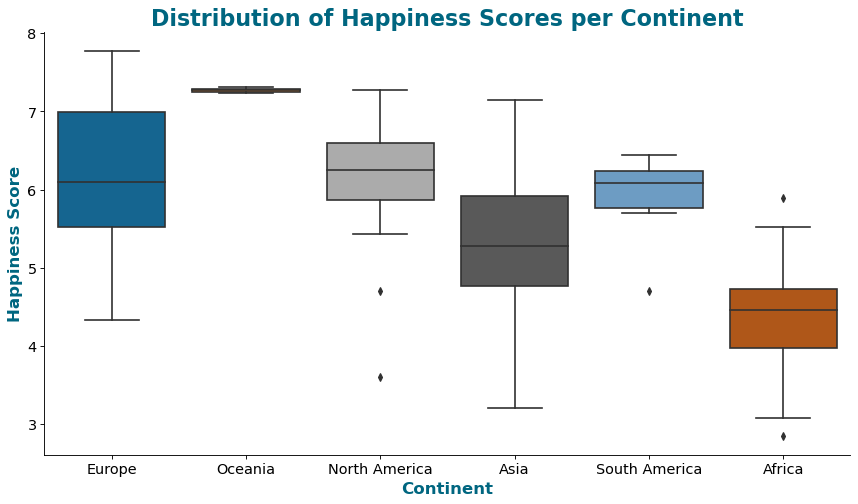

In [8]:
# Create a boxplot
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

sns.boxplot(data=df, x=df['Continent'], y=df['Happiness_Score'])

ax.set_title('Distribution of Happiness Scores per Continent', color='#006680', fontweight='bold', fontsize=20,)
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold');
ax.set_xlabel('Continent', color='#006680', fontsize=15, fontweight='bold');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)


plt.show()

We also visualized through Box and whiskers plot to provide the distribution of scores per continent. Here we can see that Europe places higher scores whereas Africa falls below.

The observation from the previous figure can be supported through the next Choropleth map, where Europe region is at green, and Africa with red. 

In [9]:
data = [dict(
        type='choropleth',
        colorscale = 'RdYlGn', #algae #darkmint #RdYlGn
        locations = df['Country'],
        z = df['Happiness_Score'],
        locationmode = 'country names',
        text = df['Country'],
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar = dict(
        title = 'Happiness Score', 
        titlefont=dict(size=13),
        tickfont=dict(size=13))
)]
layout = dict(
    title = 'Happiness Score',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data, layout = layout)
choromap

# General Analysis
## Take a closer look - how each factor affects overall happiness or one another

Economy, Social Support, and Healthy Life Expectancy have a strong degree of relationship with the Happiness Score. As each of these factors increases, the overall Happiness Score increases as well.

Factor to factor analysis shows strong degree of relationship between the following:
- Economy-Social Support 
- Economy-Healthy Life Expectancy
- Social Support-Healthy Life Expectancy


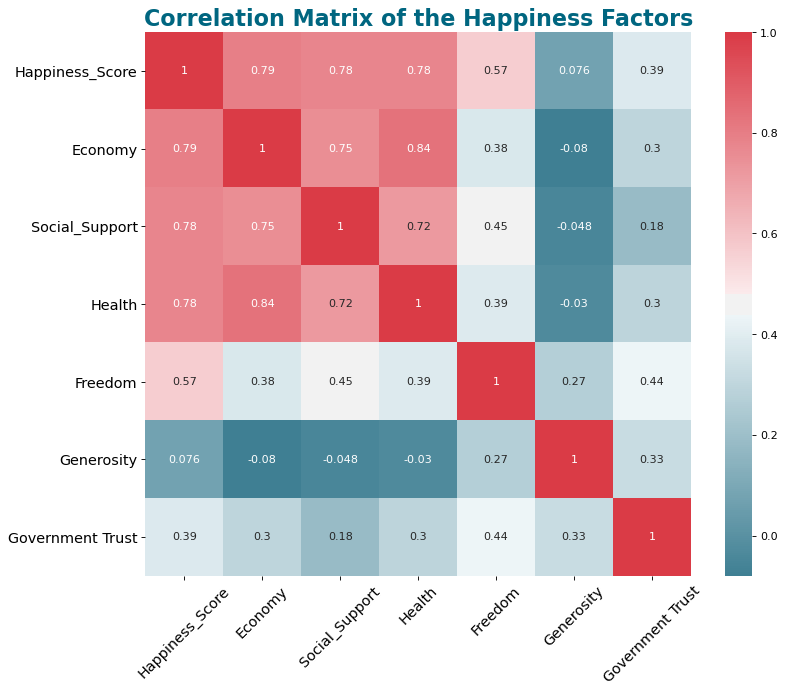

In [10]:
df4 = df.drop(['Happiness_Rank', 'Year'], 1)

fig_dims = (11, 9)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #set the plot structure

sns.heatmap(df4.corr(), annot=True, cmap=cmap)

ax.set_title('Correlation Matrix of the Happiness Factors', color='#006680', fontweight='bold', fontsize=20,)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)
plt.show()

## Three key factors affecting Happiness Scores
For the three key factors, we also did a scatterplot for each and it proves the strong relationship with the Happiness Score. This scatterplot is also labelled per continent which can be seen through the colors. It is consistent that the blue dots African countries are on the lower left quadrant whereas light gray Europe countries are on the upper right quadrant.

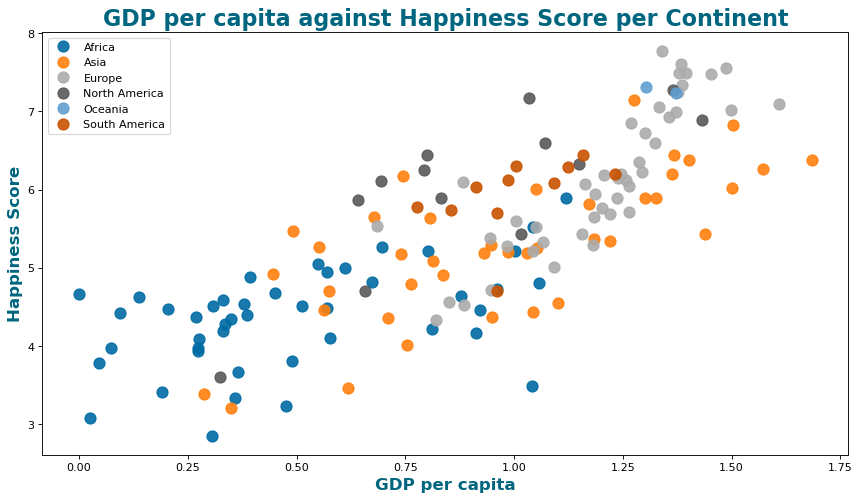

In [11]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = df4.groupby("Continent")
for name, group in groups:
    plt.plot(group["Economy"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('GDP per capita', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('GDP per capita against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

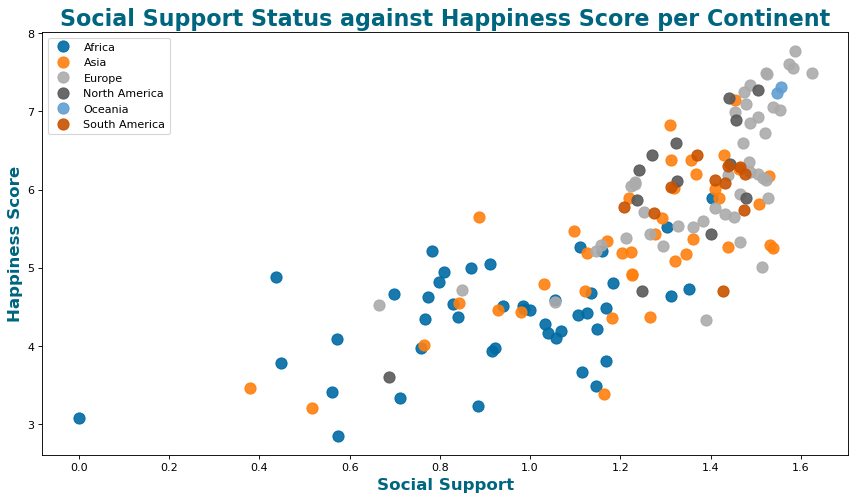

In [12]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = df4.groupby("Continent")
for name, group in groups:
    plt.plot(group["Social_Support"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Social Support', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Social Support Status against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

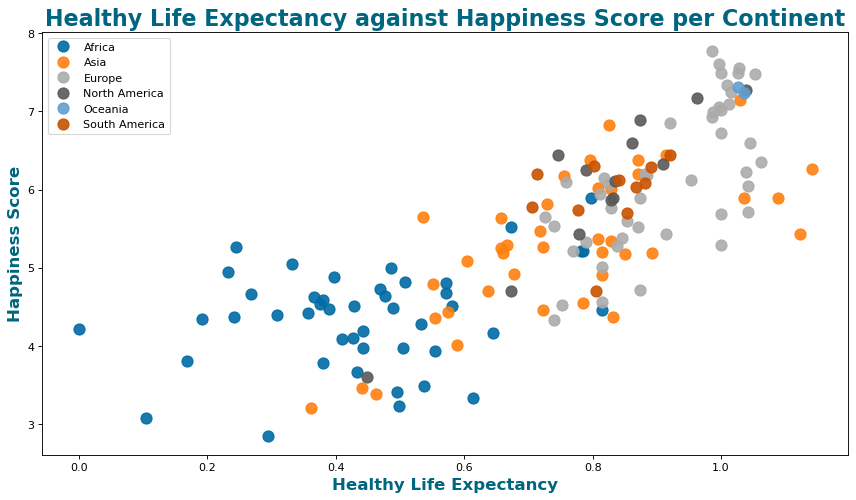

In [13]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = df4.groupby("Continent")
for name, group in groups:
    plt.plot(group["Health"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Healthy Life Expectancy', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Healthy Life Expectancy against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

## Strong factor-to-factor relationship
Regression plots were also made/ for the high factor-to-factor correlations/ to observe the values.
The regression line indicates an upward trend and proves strong correlation.

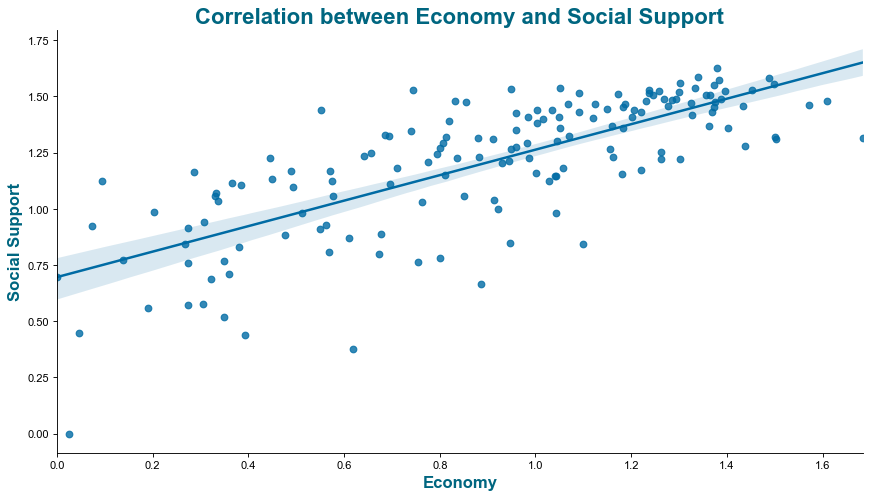

In [14]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Economy',y='Social_Support', data=df4)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Economy and Social Support', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Social Support', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

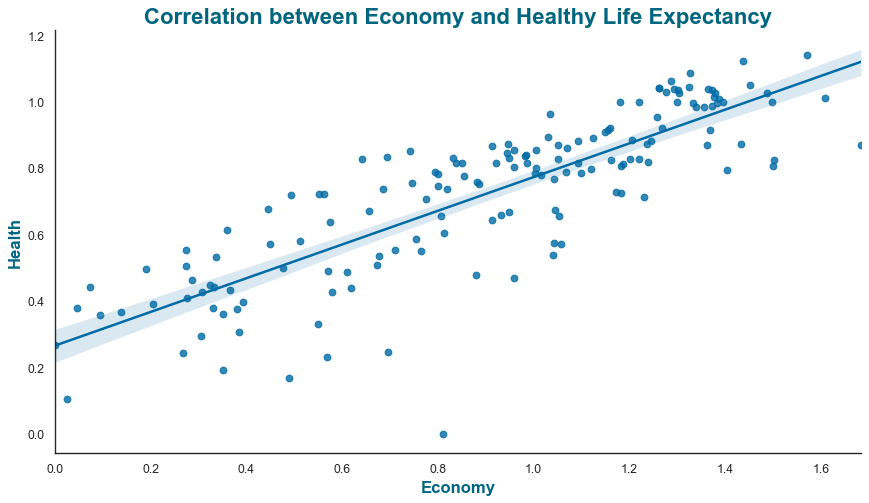

In [15]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Economy',y='Health', data=df4)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Economy and Healthy Life Expectancy', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Health', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

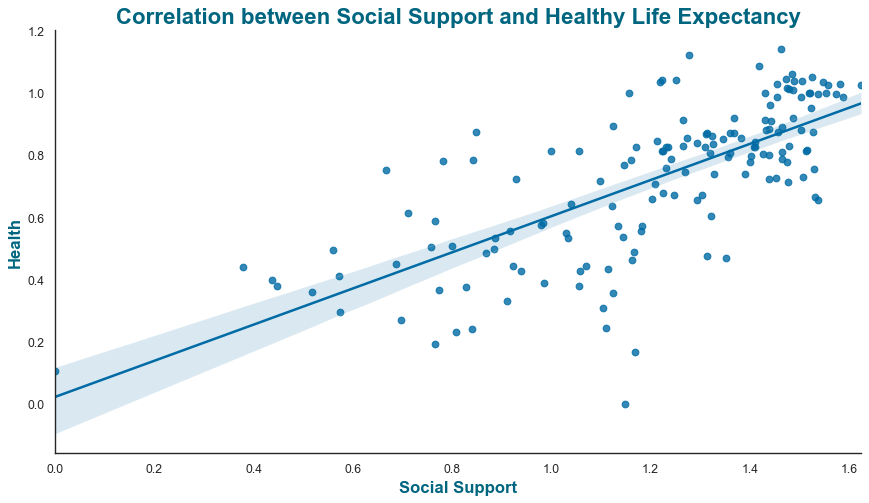

In [16]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Social_Support',y='Health', data=df4)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Social Support and Healthy Life Expectancy', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Social Support', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Health', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Country Level Analysis: Top 10 and Bottom 10

We also checked the country-level factor correlations. While for over-all analysis, Economy plays the biggest factor, it is a different story for the top 10 and bottom 10 countries.

For the Top 10, the highest factor is Social Support, and least factor is generosity.
For the Bottom 10, the highest factors are Healthy Life Expectancy and Social Support as well, while least impact is Economy.

This gives us an insight how our sense of belongingness affects overall happiness regardless if you are from a rich or poor country.

In [17]:
df2 = df.drop(['Year'], 1) 
df2.head()

Country Continent  Happiness_Rank  Happiness_Score  Economy  \
0      Finland    Europe               1            7.769    1.340   
1      Denmark    Europe               2            7.600    1.383   
2       Norway    Europe               3            7.554    1.488   
3      Iceland    Europe               4            7.494    1.380   
4  Netherlands    Europe               5            7.488    1.396   

   Social_Support  Health  Freedom  Generosity  Government Trust  
0           1.587   0.986    0.596       0.153             0.393  
1           1.573   0.996    0.592       0.252             0.410  
2           1.582   1.028    0.603       0.271             0.341  
3           1.624   1.026    0.591       0.354             0.118  
4           1.522   0.999    0.557       0.322             0.298

In [18]:
Top_10 = []

for rank in df2['Happiness_Rank']:
    if rank <= 10:
        Top_10.append(1)
    else:
        Top_10.append(0)

In [19]:
df2['Top_10'] = Top_10
df2.head(10)

Country      Continent  Happiness_Rank  Happiness_Score  Economy  \
0      Finland         Europe               1            7.769    1.340   
1      Denmark         Europe               2            7.600    1.383   
2       Norway         Europe               3            7.554    1.488   
3      Iceland         Europe               4            7.494    1.380   
4  Netherlands         Europe               5            7.488    1.396   
5  Switzerland         Europe               6            7.480    1.452   
6       Sweden         Europe               7            7.343    1.387   
7  New Zealand        Oceania               8            7.307    1.303   
8       Canada  North America               9            7.278    1.365   
9      Austria         Europe              10            7.246    1.376   

   Social_Support  Health  Freedom  Generosity  Government Trust  Top_10  
0           1.587   0.986    0.596       0.153             0.393       1  
1           1.573   0.996    0.592       0.252             0.410       1  
2           1.582   1.028    0.603       0.271             0.341       1  
3           1.624   1.026    0.591       0.354             0.118       1  
4           1.522   0.999    0.557       0.322             0.298       1  
5           1.526   1.052    0.572       0.263             0.343       1  
6           1.487   1.009    0.574       0.267             0.373       1  
7           1.557   1.026    0.585       0.330             0.380       1  
8           1.505   1.039    0.584       0.285             0.308       1  
9           1.475   1.016    0.532       0.244             0.226       1

In [20]:
df2.tail(10)

Country      Continent  Happiness_Rank  Happiness_Score  \
146                     Haiti  North America             147            3.597   
147                  Botswana         Africa             148            3.488   
148                     Syria           Asia             149            3.462   
149                    Malawi         Africa             150            3.410   
150                     Yemen           Asia             151            3.380   
151                    Rwanda         Africa             152            3.334   
152                  Tanzania         Africa             153            3.231   
153               Afghanistan           Asia             154            3.203   
154  Central African Republic         Africa             155            3.083   
155               South Sudan         Africa             156            2.853   

     Economy  Social_Support  Health  Freedom  Generosity  Government Trust  \
146    0.323           0.688   0.449    0.026       0.419             0.110   
147    1.041           1.145   0.538    0.455       0.025             0.100   
148    0.619           0.378   0.440    0.013       0.331             0.141   
149    0.191           0.560   0.495    0.443       0.218             0.089   
150    0.287           1.163   0.463    0.143       0.108             0.077   
151    0.359           0.711   0.614    0.555       0.217             0.411   
152    0.476           0.885   0.499    0.417       0.276             0.147   
153    0.350           0.517   0.361    0.000       0.158             0.025   
154    0.026           0.000   0.105    0.225       0.235             0.035   
155    0.306           0.575   0.295    0.010       0.202             0.091   

     Top_10  
146       0  
147       0  
148       0  
149       0  
150       0  
151       0  
152       0  
153       0  
154       0  
155       0

In [21]:
df_sort_happiness = df2.sort_values(by = ["Happiness_Score"])
top10_countries = df_sort_happiness["Country"].tail(10).values
bottom10_countries = df_sort_happiness["Country"].head(10).values

In [22]:
# Normalize to make variables comparable 
min_max_scaler = preprocessing.MinMaxScaler()
columns = ['Economy', 'Social_Support', 'Health', 'Freedom', 'Generosity', 'Government Trust']
df_sort_happiness = df_sort_happiness[columns]
df_sort_happiness = df_sort_happiness.dropna()
df_sort_happiness = pd.DataFrame(min_max_scaler.fit_transform(df_sort_happiness[columns]), columns = columns)

df_sort_happiness.columns = ['Economy', 'Social_Support', 'Health', 'Freedom', 'Generosity', 'Government Trust']
df_sort_happiness.shape

(156, 6)

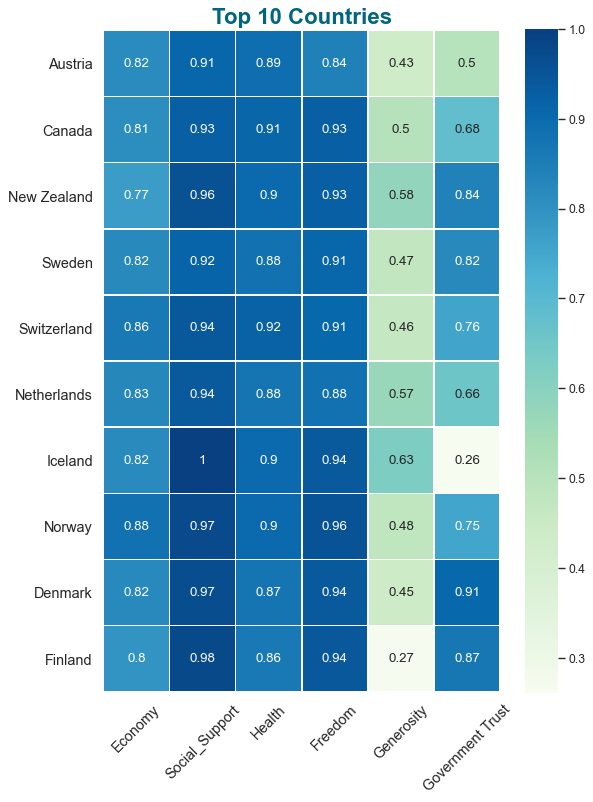

In [23]:
df_top10 = df_sort_happiness.tail(10)

Index = top10_countries 
Cols = list(df_top10.columns)

fig_dims = (8, 11)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
df_top10_heat = pd.DataFrame(df_top10.values,index = Index, columns = Cols)
sns.heatmap(df_top10_heat, cbar = True, square = True, annot=True, cmap='GnBu', linewidths = .5)

plt.yticks(rotation=0) 
ax.set_title('Top 10 Countries', color='#006680', fontweight='bold', fontsize=20)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)

plt.savefig('Top10_Happiness.png')

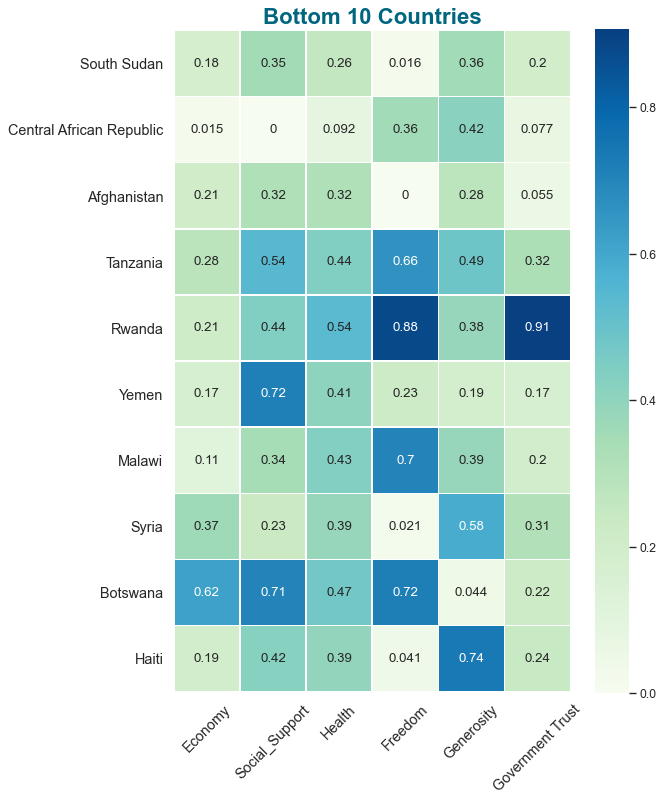

In [24]:
df_bottom10 = df_sort_happiness.head(10)

Index = bottom10_countries 
Cols = list(df_bottom10.columns)

fig_dims = (8, 11)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
df_bottom10_heat = pd.DataFrame(df_bottom10.values,index = Index, columns = Cols)
sns.heatmap(df_bottom10_heat, cbar = True, square = True, annot=True, cmap='GnBu', linewidths = .5)

plt.yticks(rotation=0) 
ax.set_title('Bottom 10 Countries', color='#006680', fontweight='bold', fontsize=20)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)

plt.savefig('Bottom10_Happiness.png')

# Model Exploration and Machine Learning

## Predicting Happiness Score

Using Linear Regression Model, we will create a model that can predict the Happiness Score. 

## Frequency and Distribution of Data

In [25]:
df2[['Happiness_Score', 'Economy','Social_Support', 'Health', 'Freedom', 'Generosity','Government Trust']].describe()

Happiness_Score     Economy  Social_Support      Health     Freedom  \
count       156.000000  156.000000      156.000000  156.000000  156.000000   
mean          5.407096    0.905147        1.208814    0.725244    0.392571   
std           1.113120    0.398389        0.299191    0.242124    0.143289   
min           2.853000    0.000000        0.000000    0.000000    0.000000   
25%           4.544500    0.602750        1.055750    0.547750    0.308000   
50%           5.379500    0.960000        1.271500    0.789000    0.417000   
75%           6.184500    1.232500        1.452500    0.881750    0.507250   
max           7.769000    1.684000        1.624000    1.141000    0.631000   

       Generosity  Government Trust  
count  156.000000        156.000000  
mean     0.184846          0.110603  
std      0.095254          0.094538  
min      0.000000          0.000000  
25%      0.108750          0.047000  
50%      0.177500          0.085500  
75%      0.248250          0.141250  
max      0.566000          0.453000

Frequency and Distribution of Data


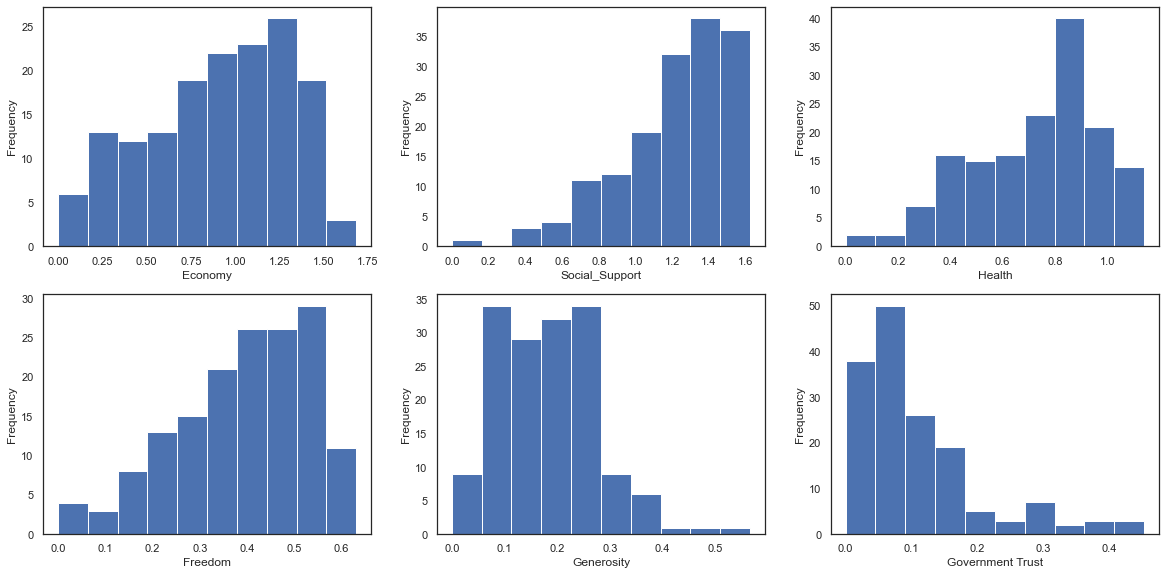

In [26]:
cols = ['Economy', 'Social_Support', 'Health', 'Freedom', 'Generosity', 'Government Trust']
print("Frequency and Distribution of Data")

plt.figure(figsize = (20, 15))
for num in range(len(cols)):
    plt.subplot(3, 3, num+1)
    plt.hist(df2[cols[num]])
    plt.ylabel('Frequency')
    plt.xlabel(cols[num])
plt.show()

## Investigating each factor behavior

We also used regression to analyze the six independent variable of the dataset. The succeeding visualizations display how the factors are related to the Happiness Score. Economy, Social Support, and Healthy Life Expectancy show a strong linear relationship to the happiness score. Perception of Corruption and Generosity have no remarkable impact on happiness score, whereas the plot for Freedom to Make Life Choices established a mild linear relationship.

In [27]:
X = df2[['Happiness_Score','Economy','Social_Support','Health','Freedom', 'Generosity','Government Trust']] #Subsetting the data
Y = X #Subsetting for future use

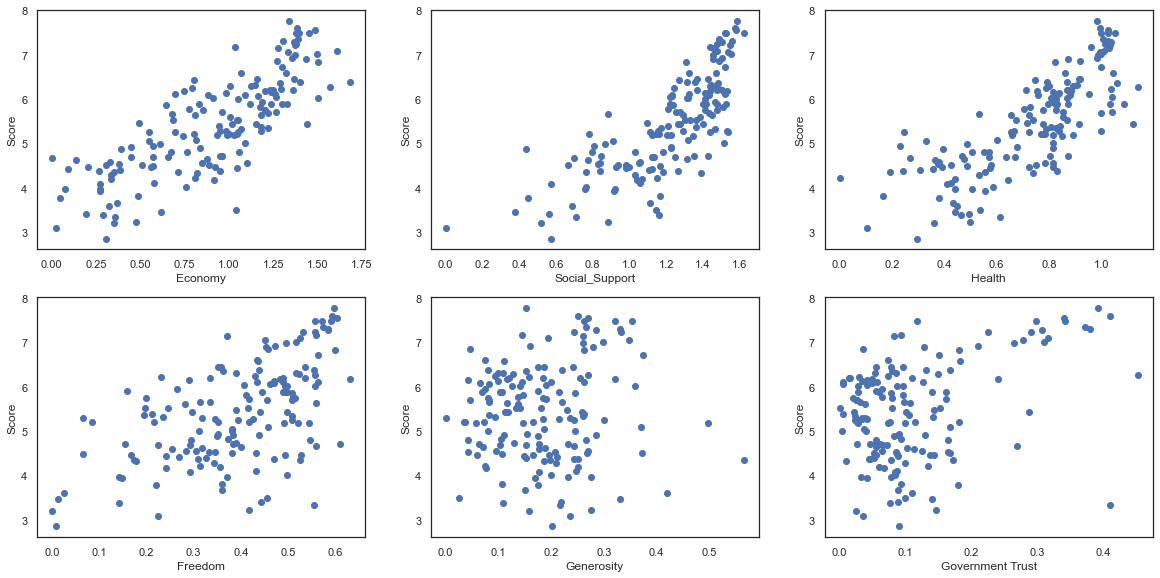

<Figure size 432x288 with 0 Axes>

In [28]:
sns.set_style("white")

cols = ['Economy','Social_Support', 'Health', 'Freedom', 'Generosity', 'Government Trust']

plt.figure(figsize = (20, 15))

for num in range(len(cols)):
    plt.subplot(3, 3, num+1)
    plt.scatter(df2[cols[num]], df2['Happiness_Score'])
    plt.ylabel('Score')
    plt.xlabel(cols[num])
    
plt.show()
plt.savefig('LinearRegression_Happiness.png')

Linear regression model for Economy, Social Support, and Health proved correlation matrix results. The trend of the scatterplot above also visualizes the R-squared values derived from the following code.

In [29]:
# get R^2, fitness of model
for var in cols:
    lin_reg = LinearRegression().fit(df2[[var]], df2['Happiness_Score'])
    print("R-squared for {}: {}".format(var, round(lin_reg.score(df2[[var]], df2['Happiness_Score']), 4)))

R-squared for Economy: 0.6303
R-squared for Social_Support: 0.6038
R-squared for Health: 0.6082
R-squared for Freedom: 0.3212
R-squared for Generosity: 0.0057
R-squared for Government Trust: 0.1487


## Build the Model: Linear Regression

The three key factors with the highest correlation scores against Happiness scores are:

- Economy(GDP per Capita)
- Social Support
- Healthy Life Expectancy

These three key factors also proved to have a positive linear relationship. We will use these key factors as the independent variable in the linear model that we will build. Happiness score is the dependent variable.

To start building the model, we first drop the variables which are least correlated and have no direct relationship with the happiness score.

We plot a histogram to verify the distribution of the data and it shows that data is normally distributed.


We can now proceed in building the linear regression model.

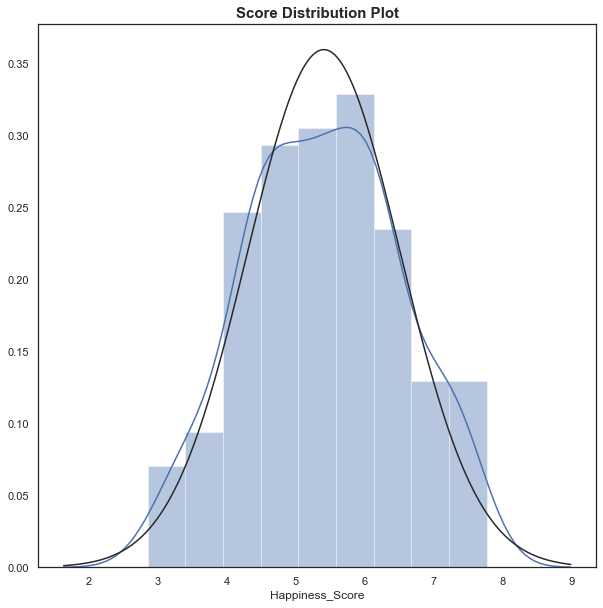

In [30]:
#Model Prediction
model = df2[['Happiness_Score','Economy','Social_Support','Health','Freedom', 'Generosity', 'Government Trust']] #Subsetting the data

plt.figure(figsize=(10,10))
sns.distplot(Y['Happiness_Score'], fit = norm)
plt.title("Score Distribution Plot",size=15, weight='bold')
plt.savefig('NormalDistribution_Happiness.png')
plt.show()

#### Split the Dataset into Train and Test

We split the data into training and test sets. 70% of the data was used as the training set, and 30% was used as the test set. The linear model is trained using the training data set and the test data is used to predict the Happiness Score.

In [31]:
# Split the dataset to training and testing set

df2_train, df2_test = train_test_split(df2, test_size=0.3, random_state=1)

x_train = df2_train[['Economy','Social_Support', 'Health']]
y_train = df2_train['Happiness_Score']

x_test = df2_test[['Economy','Social_Support', 'Health']]
y_test = df2_test['Happiness_Score']

#### Scale the Dataset

In [32]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = StandardScaler()

#Fit to the TRAIN set
scaler.fit(x_train)

#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)

#Apply to the TEST set
x_test_s = scaler.transform(x_test)

#Optional:
#Convert to DataFrame for viewing
x_train_sdf = pd.DataFrame(x_train_s, columns=x_train.columns, index=x_train.index)

#Convert to DataFrame for viewing
x_test_sdf = pd.DataFrame(x_test_s, columns=x_test.columns, index=x_test.index)

In [33]:
x_train_sdf.head()

Economy  Social_Support    Health
104 -0.416491       -0.609523 -0.744852
135 -1.537161       -0.480722 -1.199738
77   0.053049       -0.008453  0.493451
18   1.318991        0.800679  0.615596
48   0.877987        0.027875  1.323197

#### Train the Model

In [34]:
#Instantiate the Linear Regression Algorithm
linreg = linear_model.LinearRegression()

#Train the Model
linreg.fit(x_train_sdf, y_train)

LinearRegression()

#### Get the Coefficients

In [35]:
pd.DataFrame(linreg.coef_, index=x_train.columns, columns=['Coef'])

Coef
Economy         0.388840
Social_Support  0.362617
Health          0.303402

### Validate the Model

In [36]:
# Predict the values
y_pred = linreg.predict(x_test_sdf)

In [37]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)
print(("rmse: %.2f") %rmse)

r2: 0.72
mae: 0.46
mse: 0.29
rmse: 0.54


In [38]:
lm_results = pd.DataFrame(y_test)
lm_results["Predicted"] = y_pred
lm_results.head()

Happiness_Score  Predicted
117            4.534   3.980632
75             5.430   6.538951
51             6.008   5.929947
31             6.300   5.886248
35             6.223   6.540318

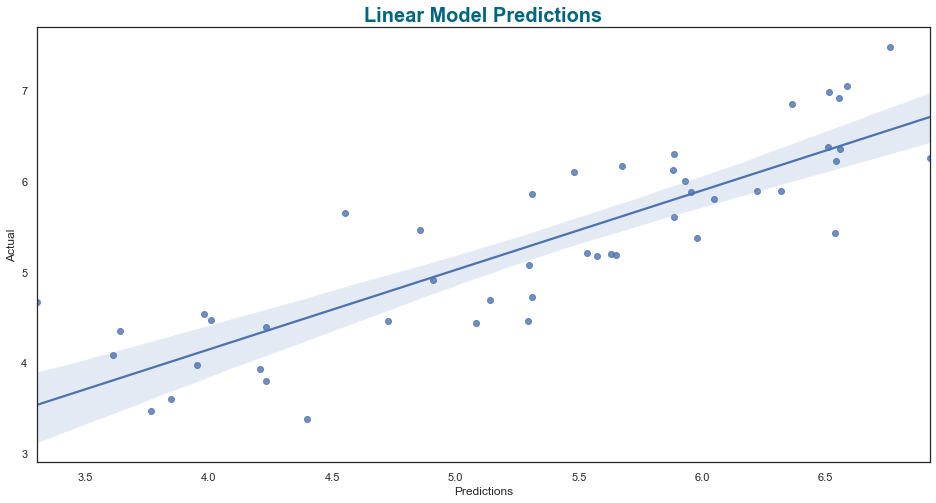

In [39]:
#Plotting the linear regression model
plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions", color='#006680', fontweight='bold', fontsize=20)
plt.grid(False)
plt.savefig('LinearModelPrediction.png')
plt.show()

Most of the data points appear to be close to the regression line indicating a good fit. This also proved positive correlation with the three key factors. With an R-squared value 0.71, it confirmed a good fit - the regression model worked good in the happiness dataset.

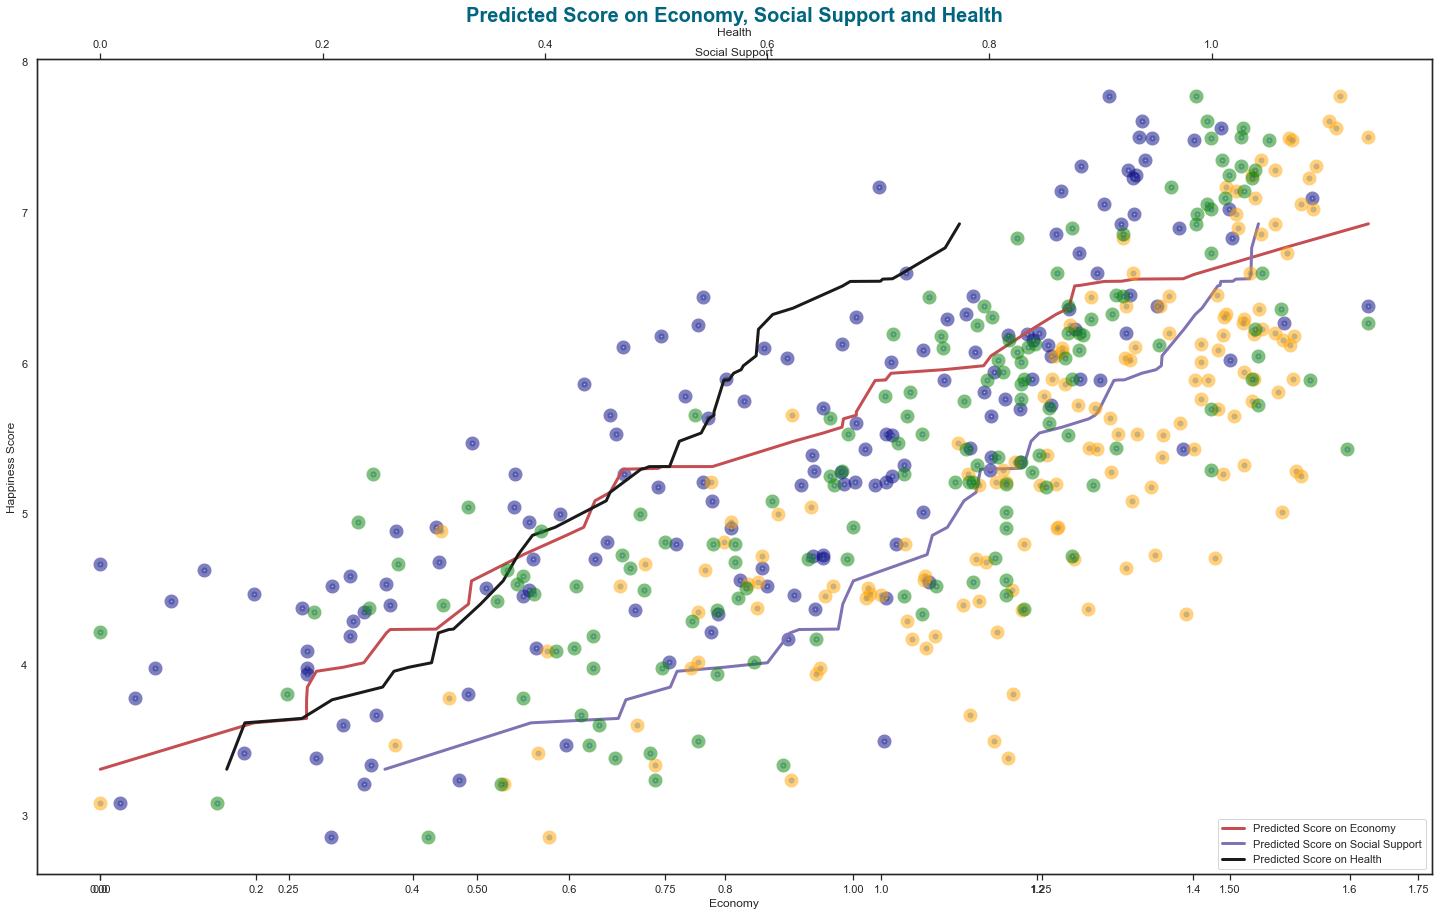

In [40]:
#Visualize the Results

fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax3 = ax2.twiny()

x_test_sort_economy = x_test.Economy.sort_values()
x_test_sort_social_support = x_test.Social_Support.sort_values()
x_test_sort_health = x_test.Health.sort_values()
predict_sort = pd.Series(y_pred, index = x_test.index).sort_values()

ax1.scatter(df2["Economy"], df2["Happiness_Score"],edgecolor="navy", alpha=0.5, linewidths=8)
ax2.scatter(df2["Social_Support"], df2["Happiness_Score"], edgecolor="orange", alpha=0.5, linewidths=8)
ax3.scatter(df2["Health"], df2["Happiness_Score"], edgecolor="green", alpha=0.5, linewidths=8)

ax1.plot(x_test_sort_economy, predict_sort, color="r", label = "Predicted Score on Economy", linewidth=3)
ax1.plot(x_test_sort_social_support, predict_sort, color="m", label = "Predicted Score on Social Support", linewidth=3)
ax1.plot(x_test_sort_health, predict_sort, color="k", label = "Predicted Score on Health", linewidth=3)

ax1.set_xlabel("Economy")
ax1.set_ylabel("Happiness Score")
ax2.set_xlabel("Social Support")
ax3.set_xlabel("Health")

ax1.legend(loc='lower right')
plt.title('Predicted Score on Economy, Social Support and Health', color='#006680', fontweight='bold', fontsize=20,)
plt.savefig('PredictedScores_Happiness.png')
plt.show()

To test the model, we run and plot the key x variables and the y variable and it returned a positive linear relationship.

Happiness Scores using the predicted linear model resulted to a positive outcome

## Overall Insights and Recommendations

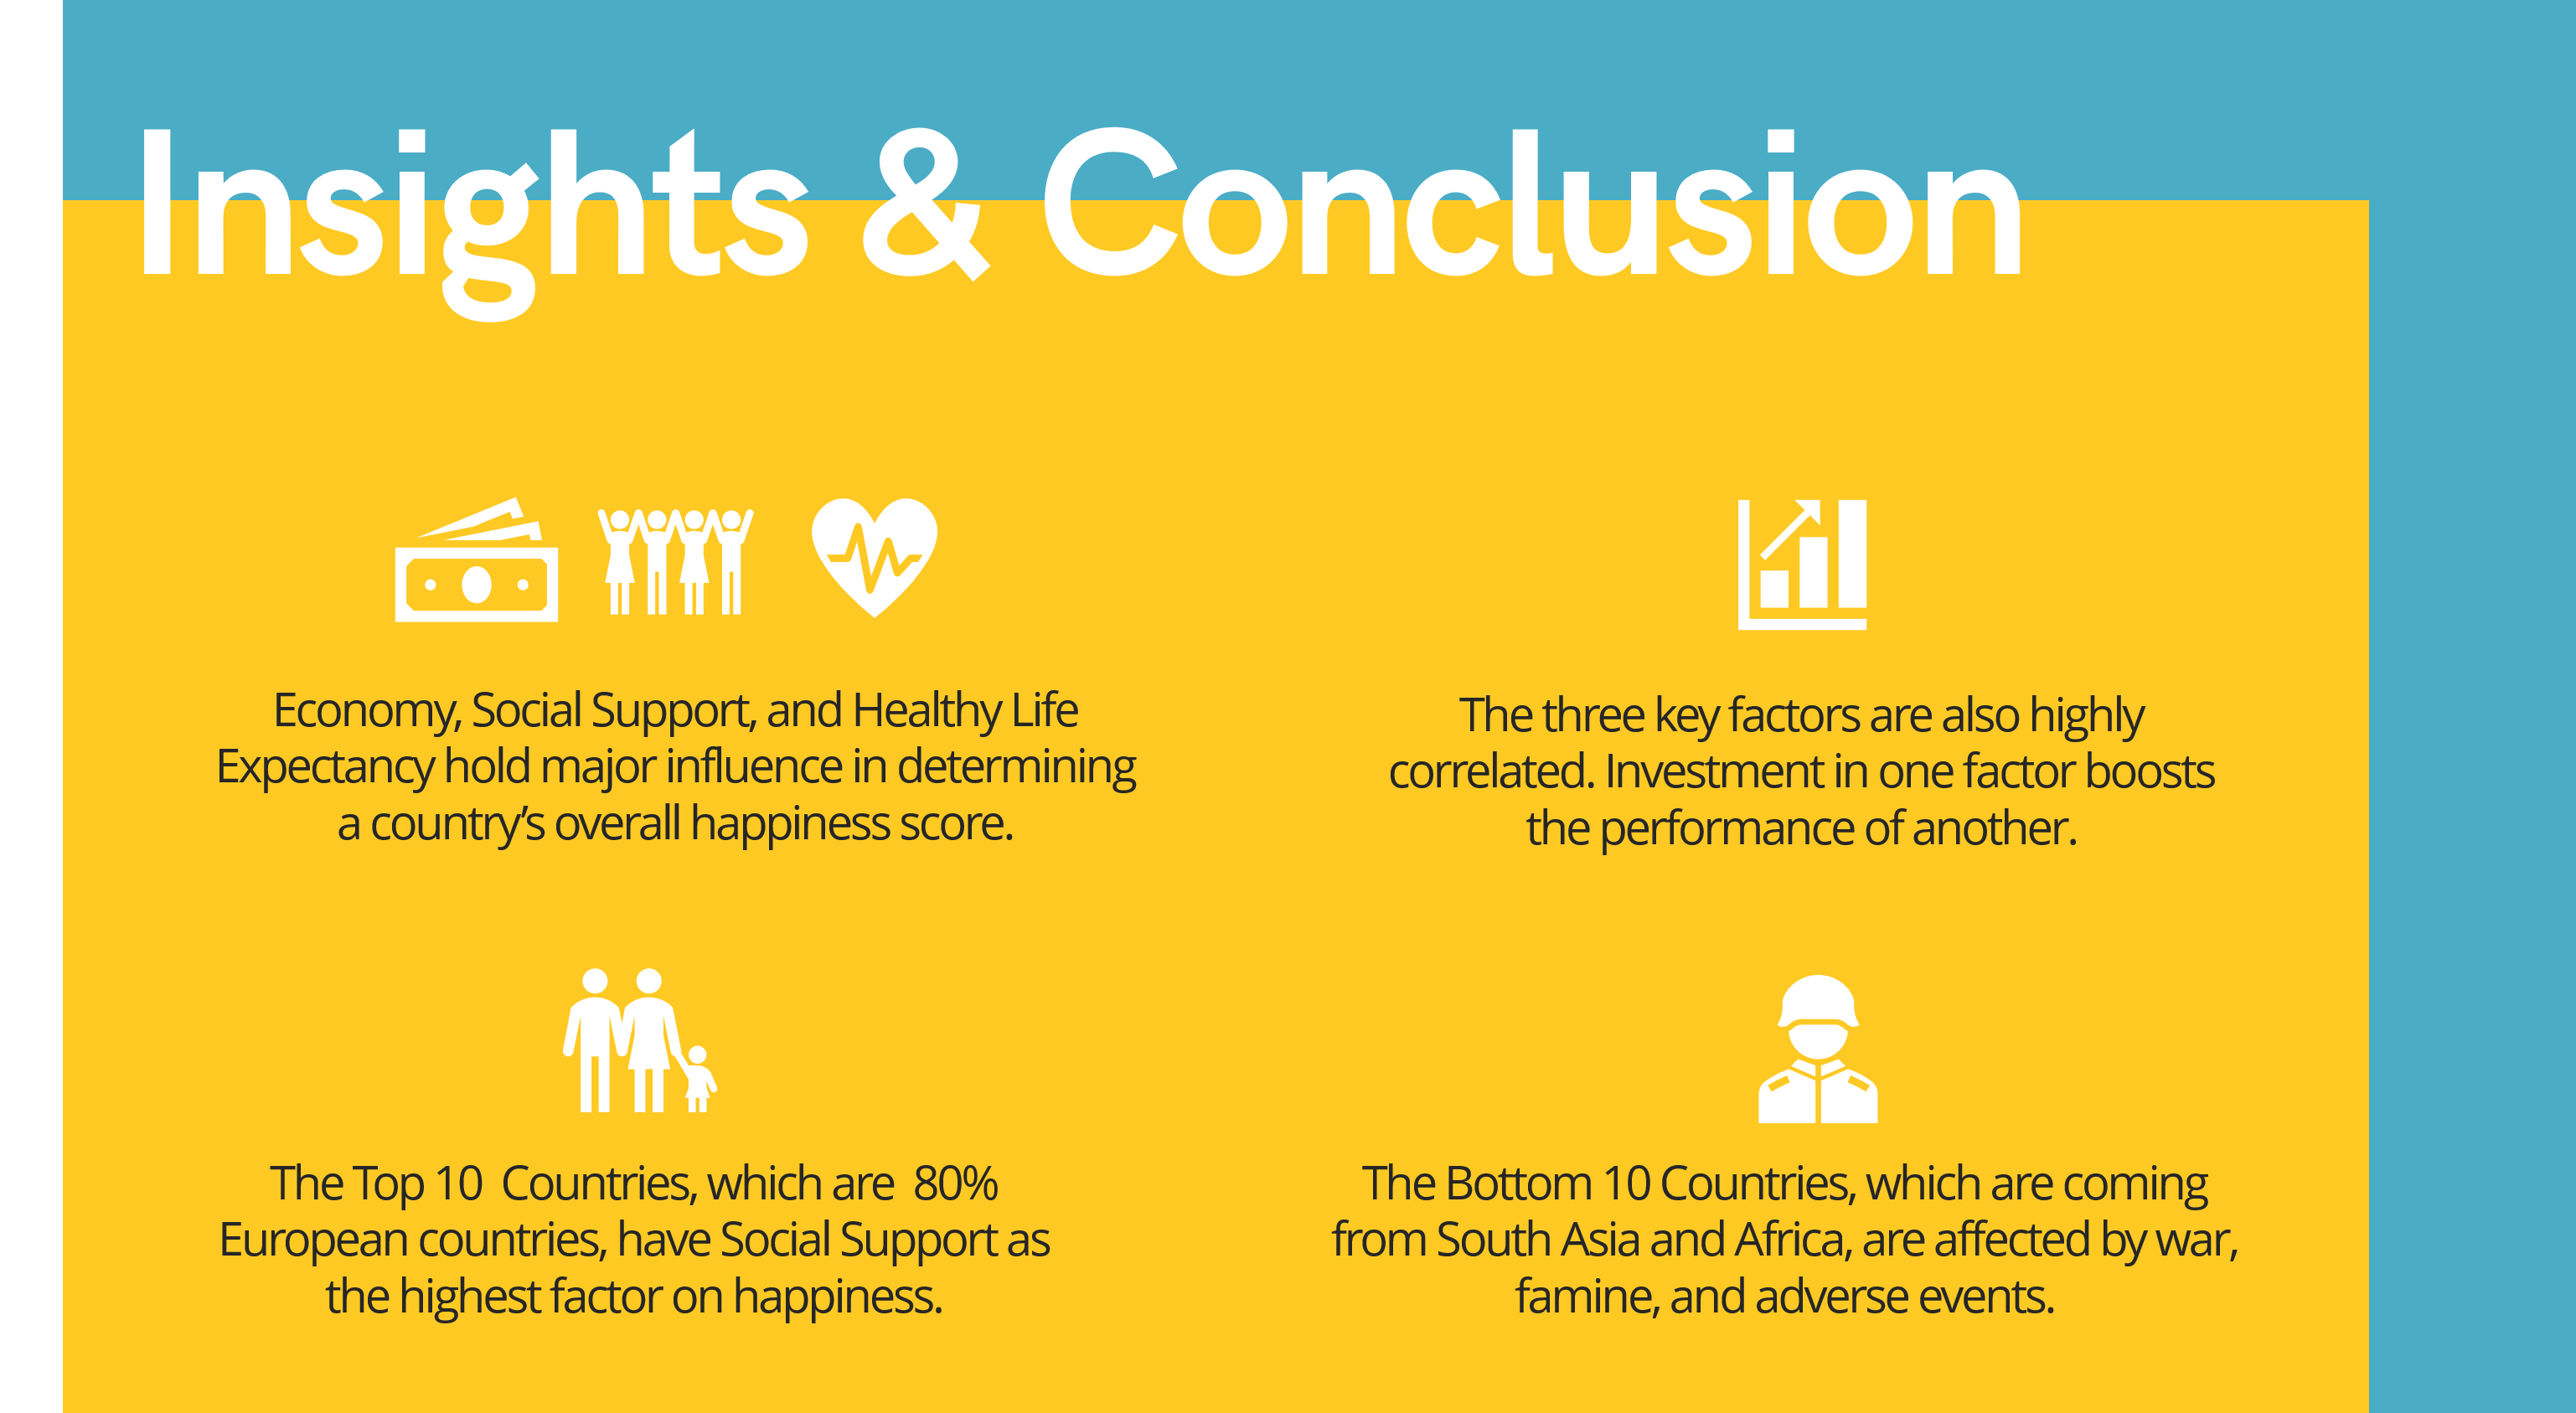

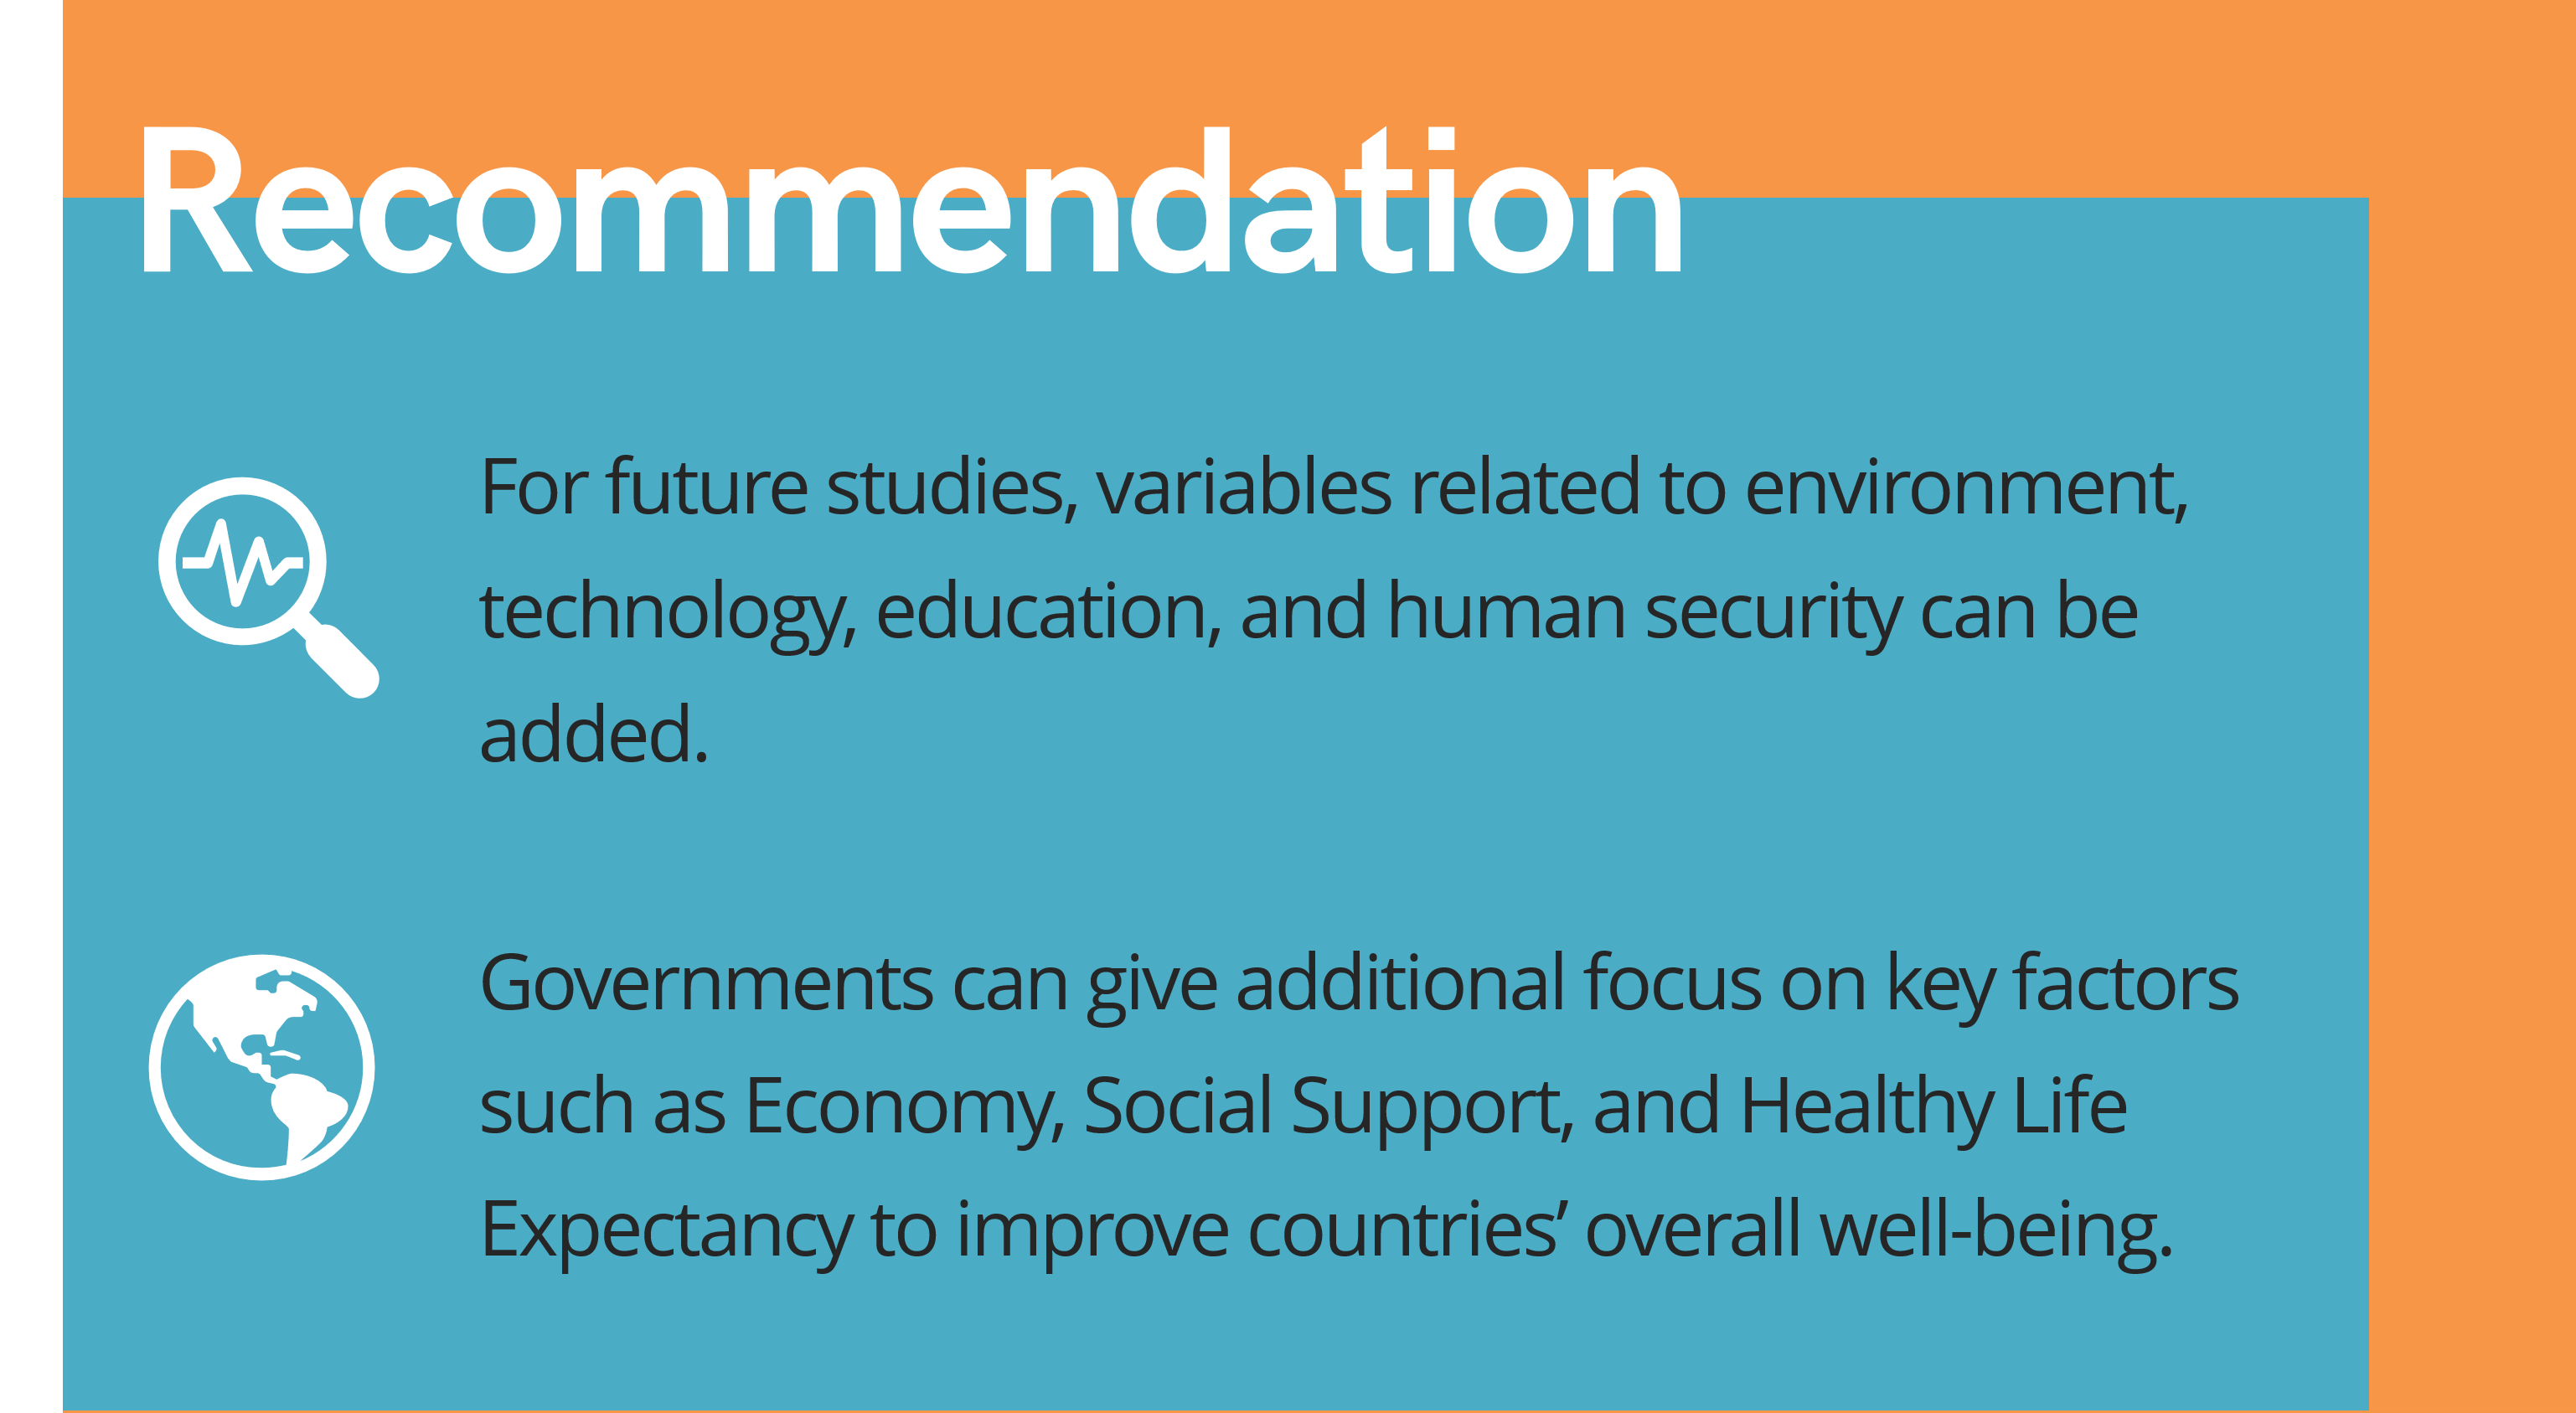